In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import warnings
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

In [2]:
churn_data= pd.read_csv('customer_churn.csv',sep=",")
churn_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Exploring data

In [3]:
churn_data['Churn'].value_counts() #binary classification

No     5174
Yes    1869
Name: Churn, dtype: int64

In [4]:
churn_data['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [5]:
churn_data.isna().sum() 

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
churn_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
churn_data.tenure.unique() 

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39])

In [8]:
churn_data.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

#### cleaning the data

In [9]:
churn_data.columns = [col.lower().replace(' ', '_') for col in churn_data.columns]
churn_data.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
churn_data['multiplelines'] = churn_data['multiplelines'].str.lower().str.replace(' ', '_')

In [11]:
churn_data['internetservice'] = churn_data['internetservice'].str.lower().str.replace(' ', '_')

In [12]:
churn_data['paymentmethod'] = churn_data['multiplelines'].str.lower().str.replace(' ', '_')

In [13]:
churn_data.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,no_phone_service,dsl,No,...,No,No,No,No,Month-to-month,Yes,no_phone_service,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,no,dsl,Yes,...,Yes,No,No,No,One year,No,no,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,no,dsl,Yes,...,No,No,No,No,Month-to-month,Yes,no,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,no_phone_service,dsl,Yes,...,Yes,Yes,No,No,One year,No,no_phone_service,42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,no,fiber_optic,No,...,No,No,No,No,Month-to-month,Yes,no,70.70,151.65,Yes


### We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.

In [14]:
churn_num = churn_data.select_dtypes(np.number) #so this is basically our X
churn_num.head()

,seniorcitizen,tenure,monthlycharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70


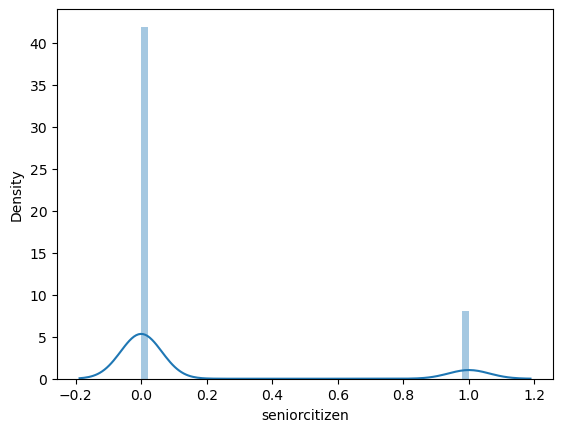

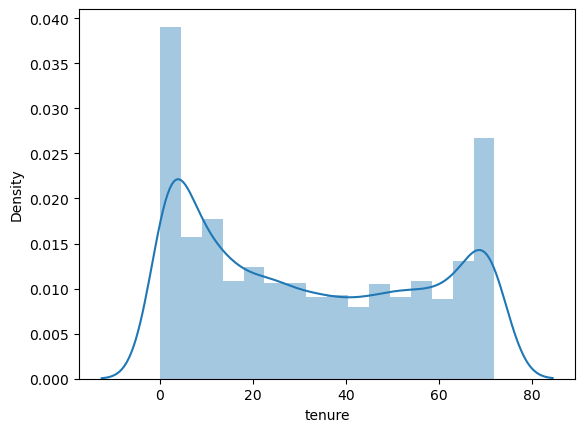

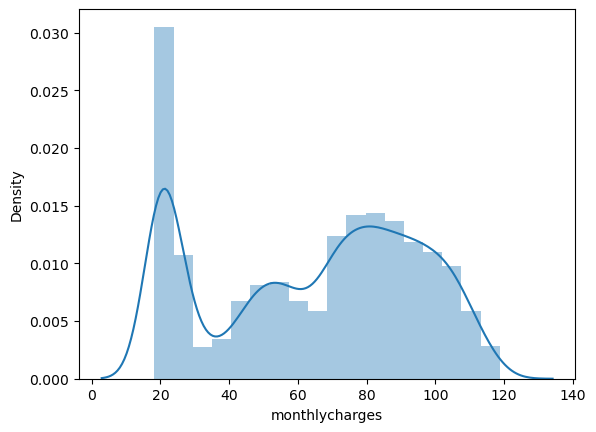

In [15]:
for col in churn_num:
    sns.distplot(churn_num[col])
    plt.show()

### Extract the target variable.

In [16]:
y = churn_data["churn"]
y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: churn, dtype: object

In [17]:
y.value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

### Extract the independent variables and scale them.

In [18]:
transformer = StandardScaler().fit(churn_num)
standard_x = transformer.transform(churn_num)
X = pd.DataFrame(standard_x)
X.head()

,0,1,2
0,-0.439916,-1.277445,-1.160323
1,-0.439916,0.066327,-0.259629
2,-0.439916,-1.236724,-0.362660
3,-0.439916,0.514251,-0.746535
4,-0.439916,-1.236724,0.197365


In [19]:
X.columns = churn_num.columns
X.head()

,seniorcitizen,tenure,monthlycharges
0,-0.439916,-1.277445,-1.160323
1,-0.439916,0.066327,-0.259629
2,-0.439916,-1.236724,-0.362660
3,-0.439916,0.514251,-0.746535
4,-0.439916,-1.236724,0.197365


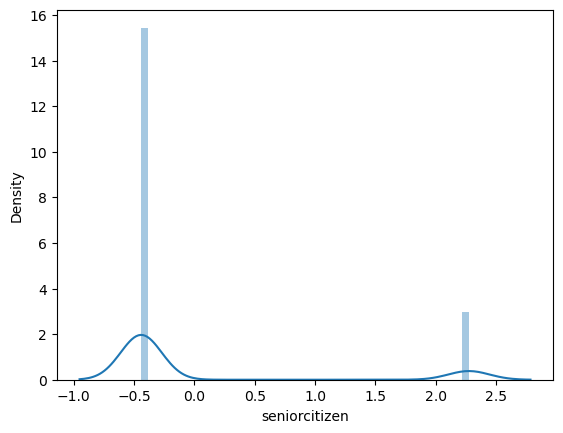

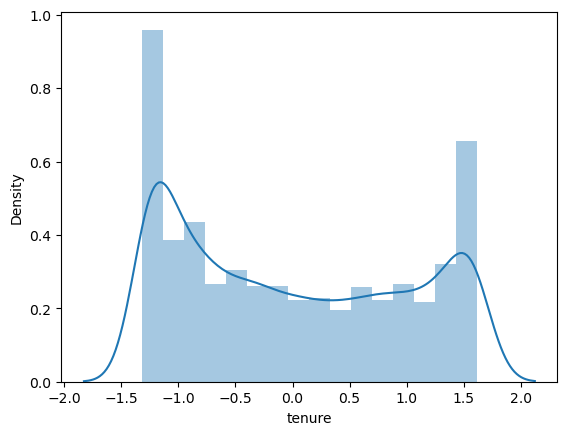

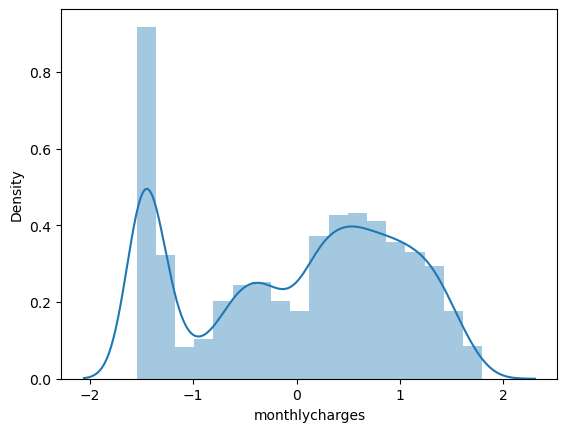

In [20]:
for col in X:
    sns.distplot(X[col])
    plt.show()

### Build the logistic regression model.

#### Train-Test Split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [22]:
len(X_test)

2113

In [23]:
classing = LogisticRegression(random_state=0, multi_class = 'ovr').fit(X_train, y_train)
predictions = classing.predict(X_test)

### Evaluate the model

In [24]:
 classing.score(X_test,y_test)

0.7936583057264552

In [25]:
confusion_matrix(y_test,predictions)

array([[1420,  119],
       [ 317,  257]])

The Kappa of your model is: 0.42


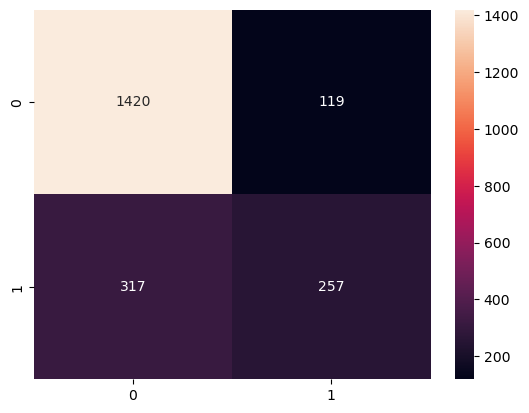

In [26]:
cm1 = confusion_matrix(y_test, predictions)
sns.heatmap(cm1, annot=True,fmt='g') 
print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, predictions)))

### Even a simple model will give us more than 70% accuracy. Why?

our data is imbalanced and we have more than 70% Nos, so the model will always predict the Nos well.

### Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [27]:
from imblearn.over_sampling import SMOTE


smote = SMOTE()
X = churn_data[['tenure', 'seniorcitizen','monthlycharges']]
transformer = StandardScaler().fit(X)
X = transformer.transform(X)
y = churn_data['churn']
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

No     5174
Yes    5174
Name: churn, dtype: int64

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=100)

classification = LogisticRegression(random_state=0, multi_class='ovr').fit(X_train, y_train)
predictions = classification.predict(X_test)

classification.score(X_test, y_test)

0.7458937198067633

In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.75      0.75      0.75      1557
         Yes       0.75      0.74      0.74      1548

    accuracy                           0.75      3105
   macro avg       0.75      0.75      0.75      3105
weighted avg       0.75      0.75      0.75      3105



In [30]:
confusion_matrix(y_test,predictions)

array([[1167,  390],
       [ 399, 1149]])

The Kappa of your model is: 0.49


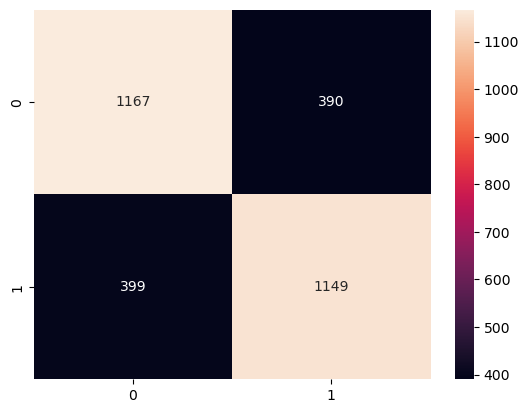

In [31]:
cm2 = confusion_matrix(y_test, predictions)
sns.heatmap(cm2, annot=True,fmt='g') 
print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, predictions)))

#### score decreased but the prediction of yes values improved.

### Apply imblearn.under_sampling.TomekLinks to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [32]:
from imblearn.under_sampling import TomekLinks


tl = TomekLinks(sampling_strategy='majority')
X_tl, y_tl = tl.fit_resample(X, y)
y_tl.value_counts()

No     4694
Yes    1869
Name: churn, dtype: int64

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_tl, y_tl, test_size=0.3, random_state=100)

classification = LogisticRegression(random_state=0, multi_class='ovr').fit(X_train, y_train)
predictions = classification.predict(X_test)

classification.score(X_test, y_test)


0.7973590655154901

In [34]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.83      0.90      0.86      1413
         Yes       0.67      0.54      0.60       556

    accuracy                           0.80      1969
   macro avg       0.75      0.72      0.73      1969
weighted avg       0.79      0.80      0.79      1969



In [35]:
confusion_matrix(y_test,predictions)

array([[1267,  146],
       [ 253,  303]])

The Kappa of your model is: 0.47


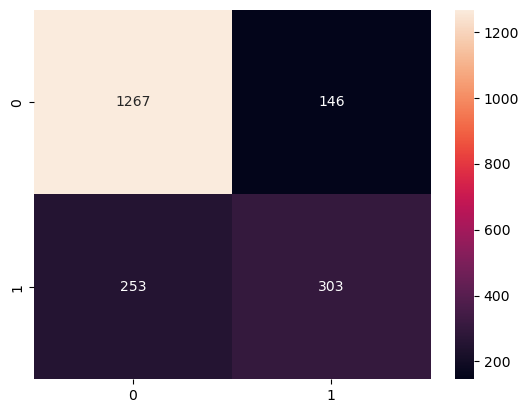

In [36]:
cm3= confusion_matrix(y_test, predictions)

sns.heatmap(cm3, annot=True,fmt='g') 
print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, predictions)))

The score is higher than when I did the SMOTE, but it slightly got better in predicting No values (TN) but it got worse in predicting yes values (TP). Compared to the original model less accurate in predicting TN and slightly more accurate in predicting TP. I think we had the best results with SMOTE considering TP although it has lower score.